<a href="https://colab.research.google.com/github/johncduran/datasci_5_statistics/blob/main/HHA_507_Wk_5_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

Here I am installing all the neccessary libraries and modules that I need from them.

# Chi Square Test

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/johncduran/datasci_5_statistics/main/datasets/Medicare_Part_D_Prescribers_by_Geography_and_Drug_2021.csv')
df2

<ipython-input-14-6b8f60dae3fb>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/Medicare_Part_D_Prescribers_by_Geography_and_Drug_2021.csv')


,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,Brnd_Name,Gnrc_Name,Tot_Prscrbrs,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Benes,...,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,LIS_Bene_Cst_Shr,NonLIS_Bene_Cst_Shr,Opioid_Drug_Flag,Opioid_LA_Drug_Flag,Antbtc_Drug_Flag,Antpsyct_Drug_Flag
0,National,NaN,National,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1178,3708,6598.5,102280.76,1313.0,...,5385.3,79992.58,NaN,1052.0,4167.66,22903.26,N,N,N,N
1,National,NaN,National,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1604,4564,7905.6,131927.33,1766.0,...,6603.0,106683.88,NaN,1450.0,4415.22,20335.83,N,N,N,N
2,National,NaN,National,Abacavir,Abacavir Sulfate,3560,30534,37402.4,7039482.37,4252.0,...,19275.5,3547013.16,NaN,2141.0,21278.04,186025.79,N,N,N,N
3,National,NaN,National,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,2933,30248,38810.9,9656849.77,4030.0,...,22159.0,5457642.63,NaN,2272.0,23576.53,376349.75,N,N,N,N
4,National,NaN,National,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,38,118,120.0,146795.20,32.0,...,74.0,91779.21,NaN,19.0,1488.48,3939.47,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114886,State,9E,Foreign Country,Zaleplon,Zaleplon,2,18,18.0,315.49,NaN,...,18.0,315.49,*,NaN,0.00,61.47,N,N,N,N
114887,State,9E,Foreign Country,Zarxio,Filgrastim-Sndz,1,40,40.0,34498.72,15.0,...,40.0,34498.72,NaN,15.0,5.00,8815.21,N,N,N,N
114888,State,9E,Foreign Country,Ziprasidone Hcl,Ziprasidone Hcl,5,55,67.0,6356.96,11.0,...,NaN,NaN,*,NaN,50.68,78.84,N,N,N,Y
114889,State,9E,Foreign Country,Zolpidem Tartrate,Zolpidem Tartrate,13,110,134.3,1143.03,48.0,...,95.3,638.81,NaN,35.0,54.32,420.37,N,N,N,N


The dataset that I am loading in here is called the 'Medicare Part D Prescribers - by Geography and Drug' dataset. It contains information on prescription drugs prescribed to Medicare patients enrolled in Part D given by thier provider. This is aggregated specifically by location and drug type.

## Hypothesis
I analyze the two categories of 'Prscrbr_Geo_Desc' and 'Antpsyct_Drug_Flag'.

My null hypothesis would be that there is no association between the number of antipsychotic drugs being prescribed and the location as to where they are being prescribed at.

My alternative hypothesis would be that there is an association between the number of antipsychotic drugs being prescribed and the location as to where they are being prescribed at.

In [ ]:
df2.columns

Index(['Prscrbr_Geo_Lvl', 'Prscrbr_Geo_Cd', 'Prscrbr_Geo_Desc', 'Brnd_Name',
       'Gnrc_Name', 'Tot_Prscrbrs', 'Tot_Clms', 'Tot_30day_Fills',
       'Tot_Drug_Cst', 'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms',
       'GE65_Tot_30day_Fills', 'GE65_Tot_Drug_Cst', 'GE65_Bene_Sprsn_Flag',
       'GE65_Tot_Benes', 'LIS_Bene_Cst_Shr', 'NonLIS_Bene_Cst_Shr',
       'Opioid_Drug_Flag', 'Opioid_LA_Drug_Flag', 'Antbtc_Drug_Flag',
       'Antpsyct_Drug_Flag'],
      dtype='object')

Here I am getting a better imgae of what the column names are contained in this dataset.

In [ ]:
contingency_table2 = pd.crosstab(df2['Prscrbr_Geo_Desc'], df2['Antpsyct_Drug_Flag'])
print(contingency_table2)

Antpsyct_Drug_Flag     N   Y
Prscrbr_Geo_Desc            
Alabama             2192  54
Alaska              1345  35
American Samoa         7   0
Arizona             2226  52
Arkansas            1884  50
...                  ...  ..
Virginia            2281  55
Washington          2150  49
West Virginia       1816  47
Wisconsin           2160  53
Wyoming             1155  33

[62 rows x 2 columns]


This contingency table shows how many Yes and No counts there are for each of the states used in the dataset. It tells us how many drugs were flagged as Antipsychotic Drugs within those states.

In [ ]:
chi2, p, _, _ = chi2_contingency(contingency_table2)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 46.068297830542996
P-value: 0.9221193402912609


Here you can see the that according to the p-value of 0.922 we would accept the null hypothesis as true since it is greater than 0.05. This means that there is no significant assosication between the amount of Antipsychotic Drugs being prescribed depending on the state it was prescribed in.

# T-Test

In [ ]:
tdata = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK5/examples/data/cms-chronic-conditions/CC_R20_P08_v10_D18_WWDSE_Cond_complete.csv')
tdata

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes,is_southern
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557,southern
1,State,Alabama,1.0,All,All,All,Alzheimer's Disease/Dementia,0.1140,25051.8813,22554.0576,0.2119,1410.8355,southern
2,State,Alabama,1.0,All,All,All,Arthritis,0.3897,15827.4930,14403.5780,0.1775,998.3314,southern
3,State,Alabama,1.0,All,All,All,Asthma,0.0499,20560.6948,18914.5834,0.2117,1614.4483,southern
4,State,Alabama,1.0,All,All,All,Atrial Fibrillation,0.0793,25450.4587,23414.3381,0.2268,1450.9822,southern
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,State,Wyoming,56.0,All,All,All,Hypertension,0.4038,14596.5257,16604.1539,0.1563,1032.4567,non-southern
1047,State,Wyoming,56.0,All,All,All,Ischemic Heart Disease,0.2010,17492.8555,20113.1132,0.1772,1248.6805,non-southern
1048,State,Wyoming,56.0,All,All,All,Osteoporosis,0.0480,19099.8147,21672.1663,0.1684,1137.0338,non-southern
1049,State,Wyoming,56.0,All,All,All,Schizophrenia and Other Psychotic Disorders,0.0154,16458.9524,18485.6017,0.2006,2171.5057,non-southern


This dataset contains information on patients with chronic conditions being readdmitted into hospitals across the U.S.

## Hypothesis

My null hypothesis would be that there is no significant differnce between the means of southern and non-southern states in regards to depression.

Alternative hypothesis would be that there is a significant differnce beween the means of southern and non southern states.

In [ ]:
tdata['is_southern'] = tdata['Bene_Geo_Desc'].apply(lambda x: 'southern' if x in ['Alabama',
        'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
        'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina',
        'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia',
        'West Virginia'] else 'non-southern')

Here I am seperating the differnt states in variables from southern states to non southern states.

In [ ]:
depression_data = tdata[tdata['Bene_Cond'] == 'Depression']
depression_data

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes,is_southern
9,State,Alabama,1.0,All,All,All,Depression,0.1838,20298.7052,18488.5409,0.2069,1423.5163,southern
29,State,Alaska,2.0,All,All,All,Depression,0.1173,17263.3505,23446.4298,0.1969,1536.4039,non-southern
49,State,Arizona,4.0,All,All,All,Depression,0.1485,18558.8051,19684.0150,0.1981,1233.8502,non-southern
70,State,Arkansas,5.0,All,All,All,Depression,0.1874,19389.7986,18031.1126,0.2140,1423.1606,southern
91,State,California,6.0,All,All,All,Depression,0.1622,21311.3747,27074.5735,0.2317,1437.0457,non-southern
112,State,Colorado,8.0,All,All,All,Depression,0.1651,18268.2056,19327.1094,0.1797,1330.8686,non-southern
133,State,Connecticut,9.0,All,All,All,Depression,0.2037,21127.8475,25238.8272,0.2265,1633.1462,non-southern
154,State,Delaware,10.0,All,All,All,Depression,0.1806,20192.8493,22449.6937,0.2136,1375.3344,southern
174,State,District of Columbia,11.0,All,All,All,Depression,0.1478,23319.6011,28062.0058,0.2808,2176.3304,southern
195,State,Florida,12.0,All,All,All,Depression,0.1948,23286.9996,23260.4847,0.2311,1397.2012,southern


Here the data is being complied to only show the rows that contain the condition of depression.

In [ ]:
southern_data = depression_data[depression_data['is_southern'] == 'southern']['Prvlnc']
southern_data

9      0.1838
70     0.1874
154    0.1806
174    0.1478
195    0.1948
216    0.1716
359    0.2147
380    0.1870
421    0.1802
505    0.1858
691    0.1930
752    0.2107
835    0.1690
876    0.1960
897    0.1819
957    0.1731
999    0.2316
Name: Prvlnc, dtype: float64

Here I am capturing the continuos variables for southern states to non-southern states. These essentially are just a list of the prevalence rates.

In [ ]:
non_southern_data = depression_data[depression_data['is_southern'] == 'non-southern']['Prvlnc']
non_southern_data

29      0.1173
49      0.1485
91      0.1622
112     0.1651
133     0.2037
236     0.0899
255     0.1835
275     0.1669
296     0.2109
317     0.1929
338     0.1982
401     0.2281
442     0.2318
463     0.2087
484     0.2207
526     0.2127
546     0.1720
566     0.1711
587     0.1461
608     0.1957
628     0.1628
649     0.1597
670     0.1702
711     0.1854
731     0.2037
773     0.1737
794     0.1925
814     0.2144
855     0.1652
917     0.2054
937     0.1966
978     0.1657
1020    0.1833
1040    0.1496
Name: Prvlnc, dtype: float64

Here I am capturing the continuous variables for non-southern states. These are just a list of the prevalence rates for non-southern states.

In [ ]:
t_stat, p_val = ttest_ind(southern_data, non_southern_data, equal_var=False)

In [ ]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.938056305313101
P-value: 0.35308911945308996


This shows that there is a mean/prevalence difference between the means of the southern and non-southern states when talking about depression. Since 0.35 is higher than the significance level of 0.05 than that means we do not reject the null hypothesis. There is not enough significant differnce between the means of southern vs non-southern states.

In [ ]:
southern_mean = southern_data.mean()
non_southern_mean = non_southern_data.mean()


In [ ]:
southern_mean

0.1875882352941176

This is the mean for all southern states

In [ ]:
non_southern_mean


0.18100588235294118

This is the mean for all non-southern states

# Anova

In [3]:
dfa = pd.read_csv('https://raw.githubusercontent.com/johncduran/datasci_5_statistics/main/datasets/COVID_19_Hospitalization_Trends_Report_Data_file_20230602.csv')
dfa

,Year,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Hosp,Total_Enrl,Avg_LOS,Pct_Dschrg_Home,Pct_Dschrg_Hspc
0,2020,National,All,All,All,All,All,All,986377.0,6.251189e+07,10.6439,0.3577,0.0492
1,2020,National,All,All,All,All,All,Rural,189268.0,1.206914e+07,9.7550,0.3945,0.0391
2,2020,National,All,All,All,All,All,Urban,794694.0,4.981956e+07,10.8475,0.3489,0.0516
3,2020,National,All,All,All,All,All,Unknown,NaN,8.223233e+04,NaN,NaN,NaN
4,2020,National,All,All,All,All,0-64,All,130536.0,8.319817e+06,11.7848,0.4958,0.0146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54256,2022,Virginia,All,All,All,All,All,Unknown,NaN,1.248800e+04,NaN,NaN,NaN
54257,2022,Washington,All,All,All,All,All,Unknown,NaN,1.807000e+03,NaN,NaN,NaN
54258,2022,West Virginia,All,All,All,All,All,Unknown,NaN,3.602000e+03,NaN,NaN,NaN
54259,2022,Wisconsin,All,All,All,All,All,Unknown,NaN,7.510000e+02,NaN,NaN,NaN


This data set shows hospitalization trends of medicare beneficiaries with COVID-19.


## Hypothesis

The null hypothesis would be that there is no significance difference in the means between races on hospitalization rates.

The alternative hypothesis would be that there is a significance of the means between races on hospitalization rates.

In [4]:
dfa.columns

Index(['Year', 'Bene_Geo_Desc', 'Bene_Mdcd_Mdcr_Enrl_Stus', 'Bene_Race_Desc',
       'Bene_Sex_Desc', 'Bene_Mdcr_Entlmt_Stus', 'Bene_Age_Desc',
       'Bene_RUCA_Desc', 'Total_Hosp', 'Total_Enrl', 'Avg_LOS',
       'Pct_Dschrg_Home', 'Pct_Dschrg_Hspc'],
      dtype='object')

Here I am getting a list of all the columns in this dataframe

In [8]:
filtered_data = dfa[(dfa['Year'] == 2020) & (dfa['Bene_Geo_Desc'] == 'West Virginia')]
filtered_data

,Year,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Hosp,Total_Enrl,Avg_LOS,Pct_Dschrg_Home,Pct_Dschrg_Hspc
182,2020,West Virginia,All,All,All,All,All,All,4863.0,442553.33333,11.5077,0.3638,0.0403
233,2020,West Virginia,All,All,All,All,All,Rural,0.0,0.00000,NaN,NaN,NaN
284,2020,West Virginia,All,All,All,All,All,Urban,0.0,0.00000,NaN,NaN,NaN
335,2020,West Virginia,All,All,All,All,All,Unknown,NaN,0.00000,NaN,NaN,NaN
386,2020,West Virginia,All,All,All,All,0-64,All,0.0,0.00000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17880,2020,West Virginia,All,All,All,All,All,Unknown,NaN,630.00000,NaN,NaN,NaN
17931,2020,West Virginia,All,All,All,All,All,Unknown,NaN,628.00000,NaN,NaN,NaN
17982,2020,West Virginia,All,All,All,All,All,Unknown,NaN,627.00000,NaN,NaN,NaN
18033,2020,West Virginia,All,All,All,All,All,Unknown,NaN,3802.00000,NaN,NaN,NaN


Here is a new dataframe I created with only info alining the rows to only show information from the year 2020 and from the state of West Virginia.

In [9]:
model = ols('Avg_LOS ~ Bene_Race_Desc', data=filtered_data).fit()

In [10]:
anova_table = sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '


Here I am creating the anova test

In [11]:
print(anova_table)

                     sum_sq     df         F    PR(>F)
Bene_Race_Desc    68.101592    6.0  1.806261  0.129293
Residual        1187.646623  189.0       NaN       NaN


Given the results we would fail to reject the null hypothesis since the p value of 0.129 is greater than the significance level of 0.05. Therefore, any differnce found could be due to random chance.

In [13]:
filtered_data.groupby('Bene_Race_Desc')['Avg_LOS'].mean()

Bene_Race_Desc
All                              12.223985
American Indian/Alaska Native          NaN
Asian/Pacific Islander           13.944400
Black/African American           14.530625
Hispanic                         13.000000
Non-Hispanic White               11.977271
Other/Unknown                          NaN
Name: Avg_LOS, dtype: float64

# Regression

In [4]:
dfr = pd.read_csv('https://raw.githubusercontent.com/johncduran/datasci_5_statistics/main/datasets/COVID_19_Hospitalization_Trends_Report_Data_file_20230602.csv')
dfr

,Year,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Hosp,Total_Enrl,Avg_LOS,Pct_Dschrg_Home,Pct_Dschrg_Hspc
0,2020,National,All,All,All,All,All,All,986377.0,6.251189e+07,10.6439,0.3577,0.0492
1,2020,National,All,All,All,All,All,Rural,189268.0,1.206914e+07,9.7550,0.3945,0.0391
2,2020,National,All,All,All,All,All,Urban,794694.0,4.981956e+07,10.8475,0.3489,0.0516
3,2020,National,All,All,All,All,All,Unknown,NaN,8.223233e+04,NaN,NaN,NaN
4,2020,National,All,All,All,All,0-64,All,130536.0,8.319817e+06,11.7848,0.4958,0.0146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54256,2022,Virginia,All,All,All,All,All,Unknown,NaN,1.248800e+04,NaN,NaN,NaN
54257,2022,Washington,All,All,All,All,All,Unknown,NaN,1.807000e+03,NaN,NaN,NaN
54258,2022,West Virginia,All,All,All,All,All,Unknown,NaN,3.602000e+03,NaN,NaN,NaN
54259,2022,Wisconsin,All,All,All,All,All,Unknown,NaN,7.510000e+02,NaN,NaN,NaN


## Hypothesis

The null hypothesis would be that there is no statistically significant relationship between the independent and dependent variables, 'Total_Hosp' and 'AVG_LOS'

The alternative hypothesis would be that there is a statistically significant relationship between the independent and dependent variables, 'Total_Hosp' and 'AVG_LOS' respectively.


In [5]:
dfr.columns


Index(['Year', 'Bene_Geo_Desc', 'Bene_Mdcd_Mdcr_Enrl_Stus', 'Bene_Race_Desc',
       'Bene_Sex_Desc', 'Bene_Mdcr_Entlmt_Stus', 'Bene_Age_Desc',
       'Bene_RUCA_Desc', 'Total_Hosp', 'Total_Enrl', 'Avg_LOS',
       'Pct_Dschrg_Home', 'Pct_Dschrg_Hspc'],
      dtype='object')

I am listing out all of the columns from the dataframe.

In [8]:
dfr2 = dfr[['Total_Hosp', 'Avg_LOS']]
dfr2

,Total_Hosp,Avg_LOS
0,986377.0,10.6439
1,189268.0,9.7550
2,794694.0,10.8475
3,NaN,NaN
4,130536.0,11.7848
...,...,...
54256,NaN,NaN
54257,NaN,NaN
54258,NaN,NaN
54259,NaN,NaN


This new dataframe only contains the columns 'Total_Hosp' and	'Avg_LOS.' This is to create a cleaner dataframe by getting rid of any unnecessary information.

In [11]:
dfr3 = dfr2.dropna()
dfr3

,Total_Hosp,Avg_LOS
0,986377.0,10.6439
1,189268.0,9.7550
2,794694.0,10.8475
4,130536.0,11.7848
5,342290.0,11.1948
...,...,...
53542,234.0,6.6026
53543,234.0,6.3547
53544,194.0,6.4639
53545,462.0,6.5260


Using this command I am dropping any rows that contain no information in the cells as to not influence the results.

In [14]:
X = dfr3['Total_Hosp']
y = dfr3['Avg_LOS']

Here I am defining the independent and dependent variable using 'X' and 'y' respectively.

In [15]:
X = sm.add_constant(X)

Here I am adding a constant to the independent variable

In [16]:
model = sm.OLS(y, X).fit()

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Avg_LOS   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     43.65
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.97e-11
Time:                        00:47:52   Log-Likelihood:            -1.1237e+05
No. Observations:               40447   AIC:                         2.247e+05
Df Residuals:                   40445   BIC:                         2.248e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6943      0.020    544.938      0.0

The p-value shown here of 0.000 means that there is statistical significance that the variable Total_Hosp is related to Avg_LOS. The R-squared value of 0.001 or 0.1% means that only a small percent of the variance of the dependent variable can be explained by the independent variable. That means the regression model is most likely not the best test for this dataset.

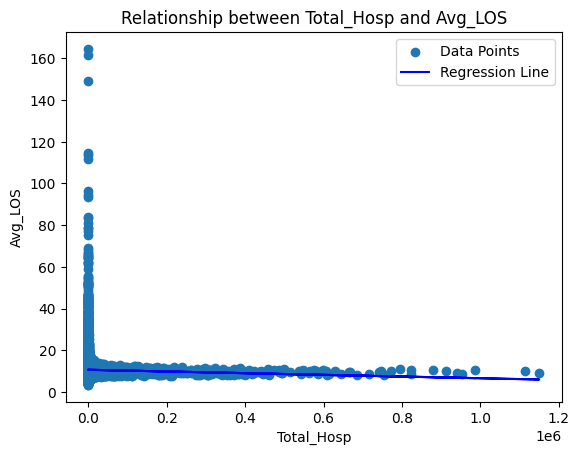

In [19]:
plt.scatter(dfr3['Total_Hosp'], dfr3['Avg_LOS'], label='Data Points')
plt.plot(dfr3['Total_Hosp'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('Total_Hosp')
plt.ylabel('Avg_LOS')
plt.title('Relationship between Total_Hosp and Avg_LOS')
plt.legend()
plt.show()